## This notebook demonstrate the time evaluation of the wave function for 
# Linear Harmonic Osccilator
### Here, I assume the solution of Schrödinger equation subject to potential $ V(x) = \frac{1}{2} m \omega x^2 $

In [10]:
#importing libraries
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

#`%matplotlib notebook` is used to plot the animation within the notebook
%matplotlib notebook  

In [5]:
#define a function her() to generate hermite polynomial of n th order

poly = {}
def her(n):
    var = np.linspace(-20, 20, 10000)
    if (n in poly):
        return poly[n]
    elif  n==0:
        val0 = 1
        return val0
    elif n==1:
        val_1 = 2 * var 
        val=val_1
        poly[1]= val
        return val
    else:
        val = ((2*var*her(n-1)) - (2*(n-1)*her(n-2)))
        value = val
        poly[n]=value
        return value

## This lines of code is used to generate n th state of the wave function, have Energy En=n+0.5

<IPython.core.display.Javascript object>


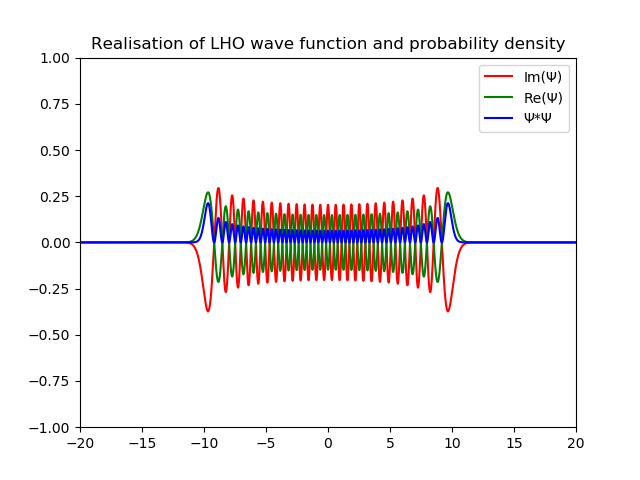

In [11]:
#setting up initial plot
fig = plt.figure()
ax = plt.axes(xlim=(-20, 20), ylim=(-1, 1))
x = np.linspace(-20,20,10000)
y = x*0
line1, = ax.plot(x, y, color = "r")
line2, = ax.plot(x, y, color = "g")
line3, = ax.plot(x, y, color = "b")

line1.set_label('Im(Ψ)')
line2.set_label('Re(Ψ)')
line3.set_label('Ψ*Ψ')
legend = plt.legend()
plt.title("Realisation of LHO wave function and probability density")

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line = [line1, line2, line3]
    return line


#generate data and help in animation 
def animate(i):
    m = 1
    w = 1
    h_bar = 1
    n=50
    En = n + .5
    var = np.linspace(-20, 20, 10000)
    A = her(n)*np.exp(-(var**2)/2)
    psi = A * (1 / (math.pow(2, n) * math.factorial(n))**0.5) * ((m*w/(math.pi*h_bar))**0.25)
    y1 = np.sin(2 * np.pi * En * i) * psi
    y2 = np.cos(2 * np.pi *En * i) * psi
    y3 = psi * psi
    line1.set_data(var, y1)
    line2.set_data(var, y2)
    line3.set_data(var, y3)
    return [line1, line2, line3]


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, 8, 0.1), interval=100, blit=True)

plt.show()

# This lines of code is used to generate  animation of the superposition of first 'k' numbers of state.

<IPython.core.display.Javascript object>


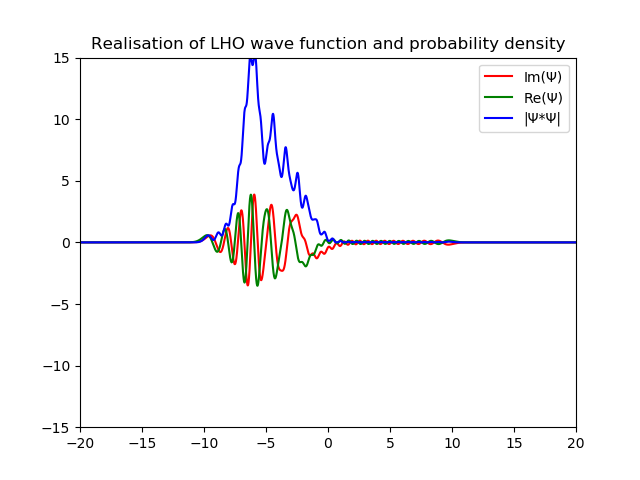

In [12]:
"""
CAUTION: In the superposition, aprropiate coefficients of differeent wave function is not used, hence the total wave function is not
normalized. Coefficients are subjected to initial condition and can be evaluated using Fourier's trick
"""

fig = plt.figure()
ax = plt.axes(xlim=(-20, 20), ylim=(-15, 15))
x = np.linspace(-20,20,10000)
y = x*0
line1, = ax.plot(x, y, color = "r")
line1.set_label('Im(Ψ)')
line2, = ax.plot(x, y, color = "g")
line2.set_label('Re(Ψ)')
line3, = ax.plot(x, y, color = "b")
line3.set_label('|Ψ*Ψ|')
legend = plt.legend()
plt.title("Realisation of LHO wave function and probability density")

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line = [line1, line2, line3]
    return line

#Animation part
def animate(i):
    m = 1
    w = 1
    h_bar = 1
    n=0
    En = 0.5
    #number of state taken is 'k'
    k=50
    var = np.linspace(-20, 20, 10000)
    A = her(n)*np.exp(-(var**2)/2)
    psi = A * (1 / (math.pow(2, n) * math.factorial(n))**0.5) * ((m*w/(math.pi*h_bar))**0.25)
    #imaginary part
    y1 = np.sin(En * i) * psi
    #real part
    y2 = np.cos(En * i) * psi
    
    #making the superposition of states
    for n in range(1, k+1):
        En = n + 0.5
        A = her(n)*np.exp(-(var**2)/2)
        psi = A * (1 / (math.pow(2, n) * math.factorial(n))**0.5) * ((m*w/(math.pi*h_bar))**0.25)
        y1 = y1 + psi * np.sin(En * i)
        y2 = y2 + psi * np.cos(En * i)
    #probability density function(y3)
    y3 = y1**2 + y2**2    
    line1.set_data(var, y1)
    line2.set_data(var, y2)
    line3.set_data(var, y3)
    return [line1, line2, line3]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, np.pi * 8, 0.1), interval=100, blit=False)

plt.show()